In [2]:
%pip install folium


   ---------------------------------------- 2/2 [folium]

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Read the data from the URL directly into a DataFrame
try:
    df = pd.read_csv(URL)
    print('Data downloaded and read into a dataframe successfully!')
    print('---')
    print('Here are the first 5 rows of the DataFrame:')
    print(df.head())
except Exception as e:
    print(f"An error occurred: {e}")

Data downloaded and read into a dataframe successfully!
---
Here are the first 5 rows of the DataFrame:
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319   

In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

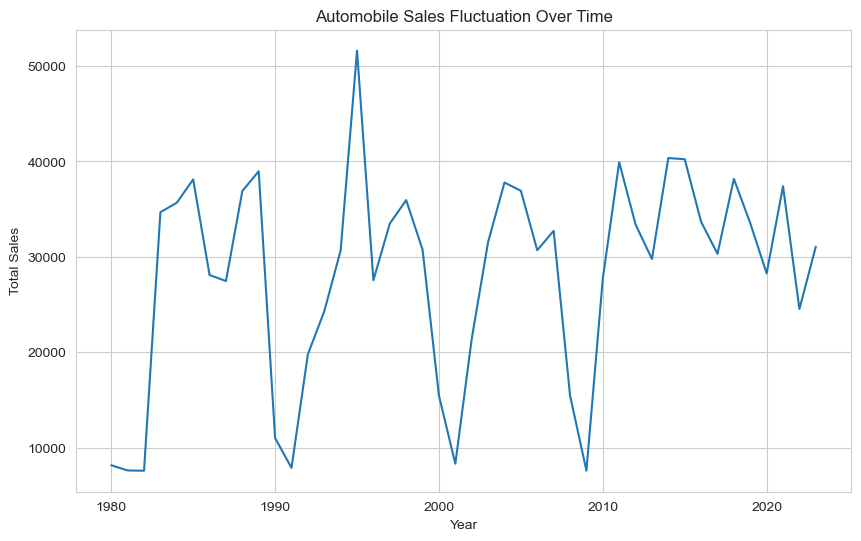

In [16]:
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()

# Create a line chart
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line')
plt.title('Automobile Sales Fluctuation Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.savefig('Line_plot_1.png')
plt.show()

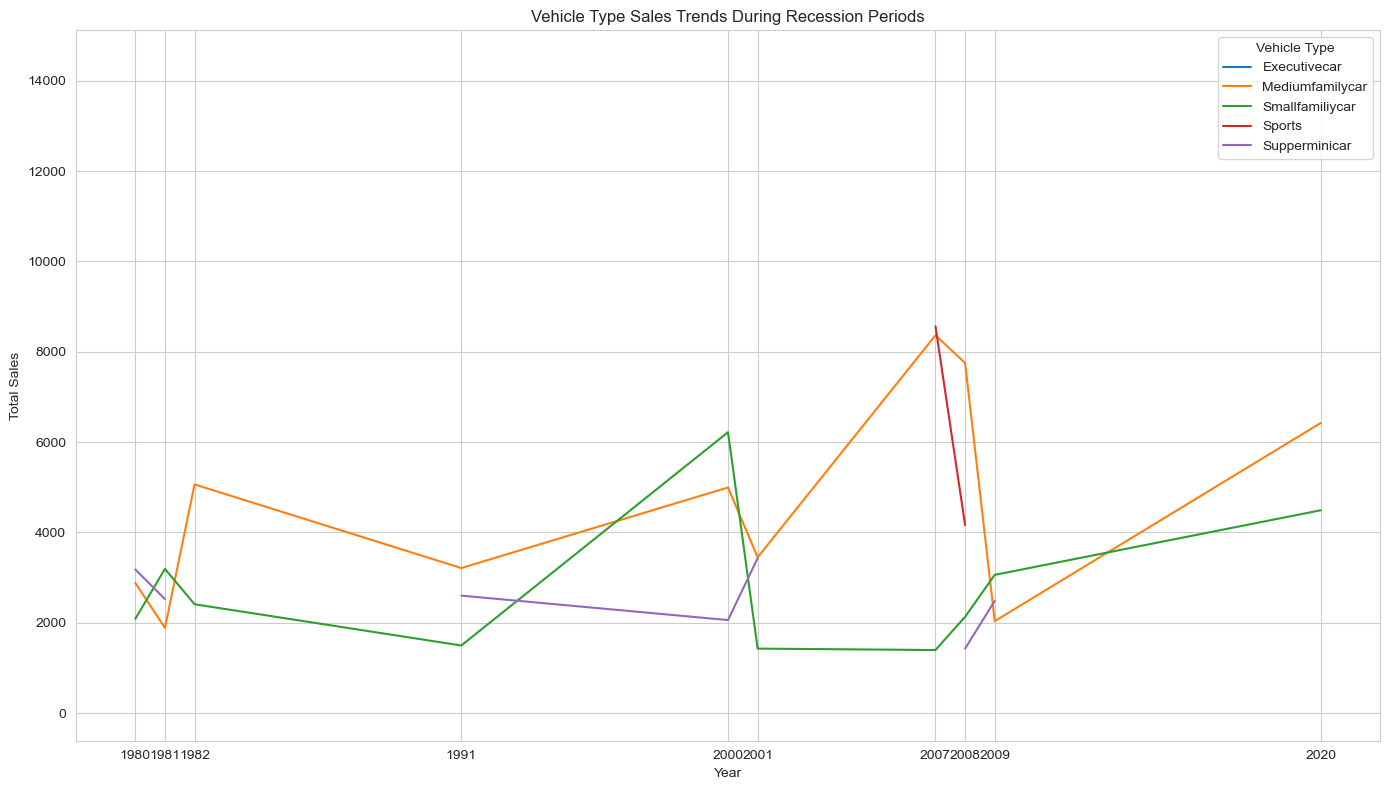

In [17]:
recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
df_recession = df[df['Year'].isin(recession_years)]

recession_sales_by_type = df_recession.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

plt.figure(figsize=(14, 8))
recession_sales_by_type.plot(kind='line', ax=plt.gca())
plt.title('Vehicle Type Sales Trends During Recession Periods')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.xticks(recession_sales_by_type.index)
plt.tight_layout()
plt.savefig('Line_plot_2.png')
plt.show()

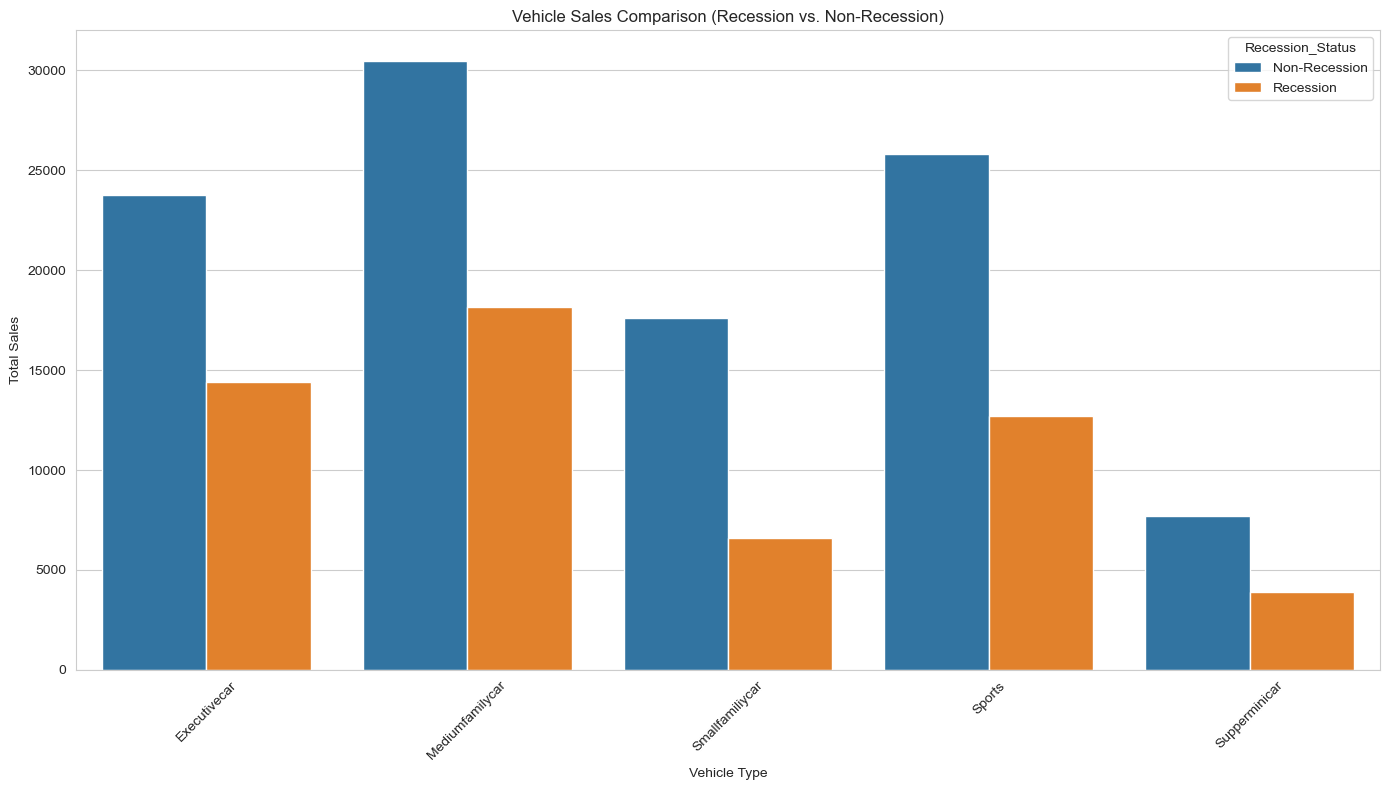

In [18]:

recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
df['Recession_Status'] = df['Year'].apply(lambda x: 'Recession' if x in recession_years else 'Non-Recession')

comparison_df = df[df['Year'].isin(list(range(2004, 2010)))]

sales_comparison = comparison_df.groupby(['Recession_Status', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=sales_comparison, x='Vehicle_Type', y='Automobile_Sales', hue='Recession_Status')
plt.title('Vehicle Sales Comparison (Recession vs. Non-Recession)')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Bar_Chart.png')
plt.show()

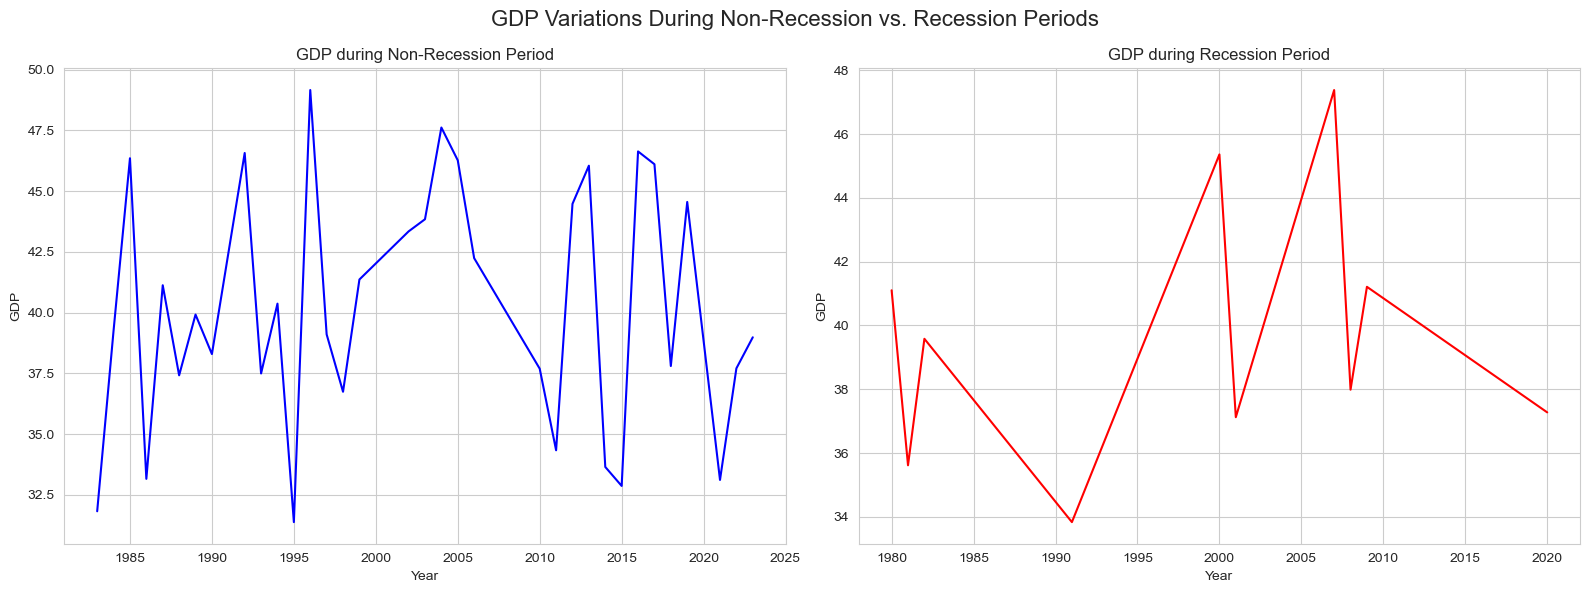

In [19]:
recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
df['Recession_Status'] = df['Year'].apply(lambda x: 'Recession' if x in recession_years else 'Non-Recession')

non_recession_data = df[df['Recession_Status'] == 'Non-Recession']
recession_data = df[df['Recession_Status'] == 'Recession']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(data=non_recession_data, x='Year', y='GDP', ax=ax1, color='blue', errorbar=None)
ax1.set_title('GDP during Non-Recession Period')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

sns.lineplot(data=recession_data, x='Year', y='GDP', ax=ax2, color='red', errorbar=None)
ax2.set_title('GDP during Recession Period')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')

fig.suptitle('GDP Variations During Non-Recession vs. Recession Periods', fontsize=16)
plt.tight_layout()
plt.savefig('Subplot.png')
plt.show()

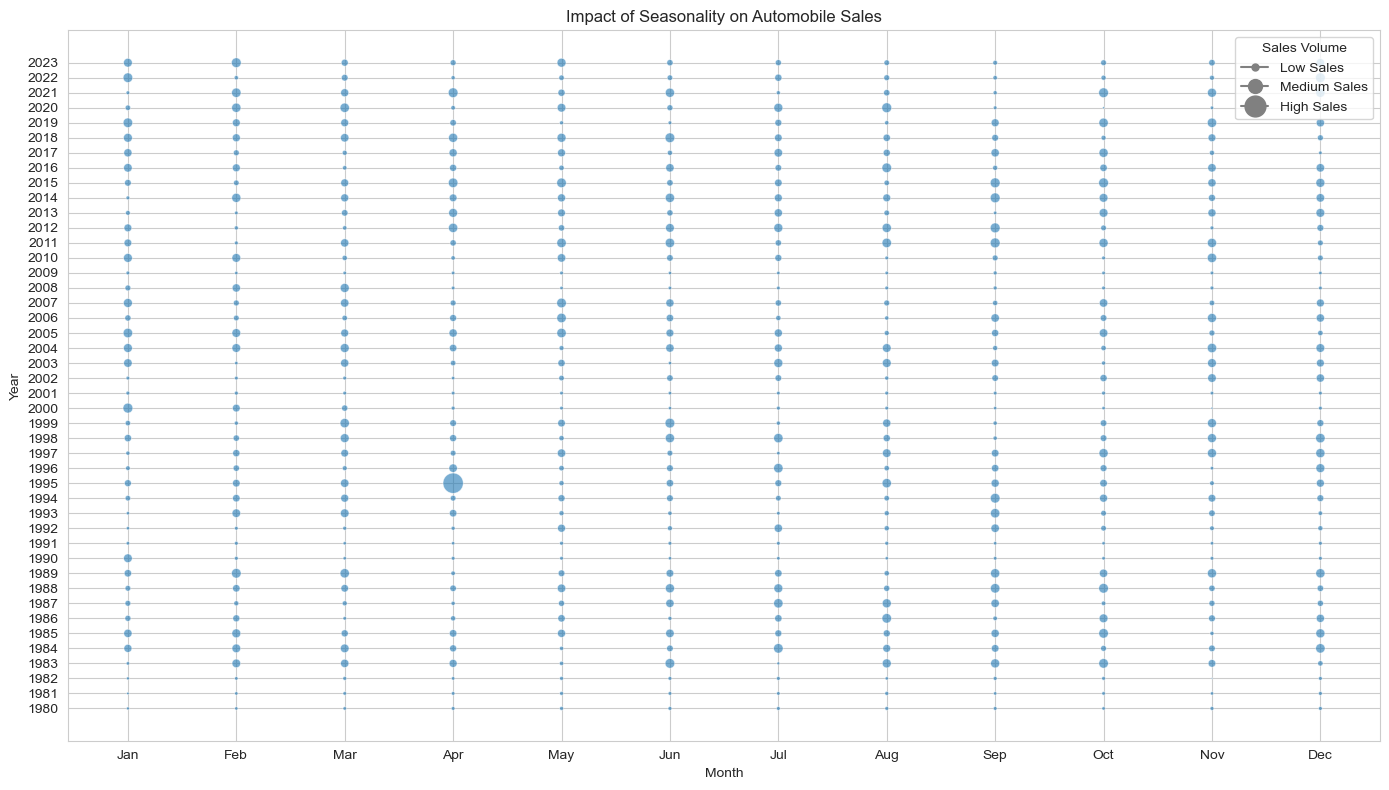

In [20]:

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

monthly_sales = df.groupby(['Year', 'Month'])['Automobile_Sales'].sum().reset_index()
bubble_sizes = monthly_sales['Automobile_Sales'] / 100

plt.figure(figsize=(14, 8))
scatter = plt.scatter(x=monthly_sales['Month'],
                      y=monthly_sales['Year'],
                      s=bubble_sizes,
                      alpha=0.6,
                      edgecolors='w',
                      linewidth=0.5)

plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Year')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(1, 13), month_names)
plt.yticks(monthly_sales['Year'].unique())

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='gray', label='Low Sales', markersize=5),
    plt.Line2D([0], [0], marker='o', color='gray', label='Medium Sales', markersize=10),
    plt.Line2D([0], [0], marker='o', color='gray', label='High Sales', markersize=15)
]
plt.legend(handles=legend_elements, title='Sales Volume')

plt.tight_layout()
plt.savefig('Bubble.png')
plt.show()

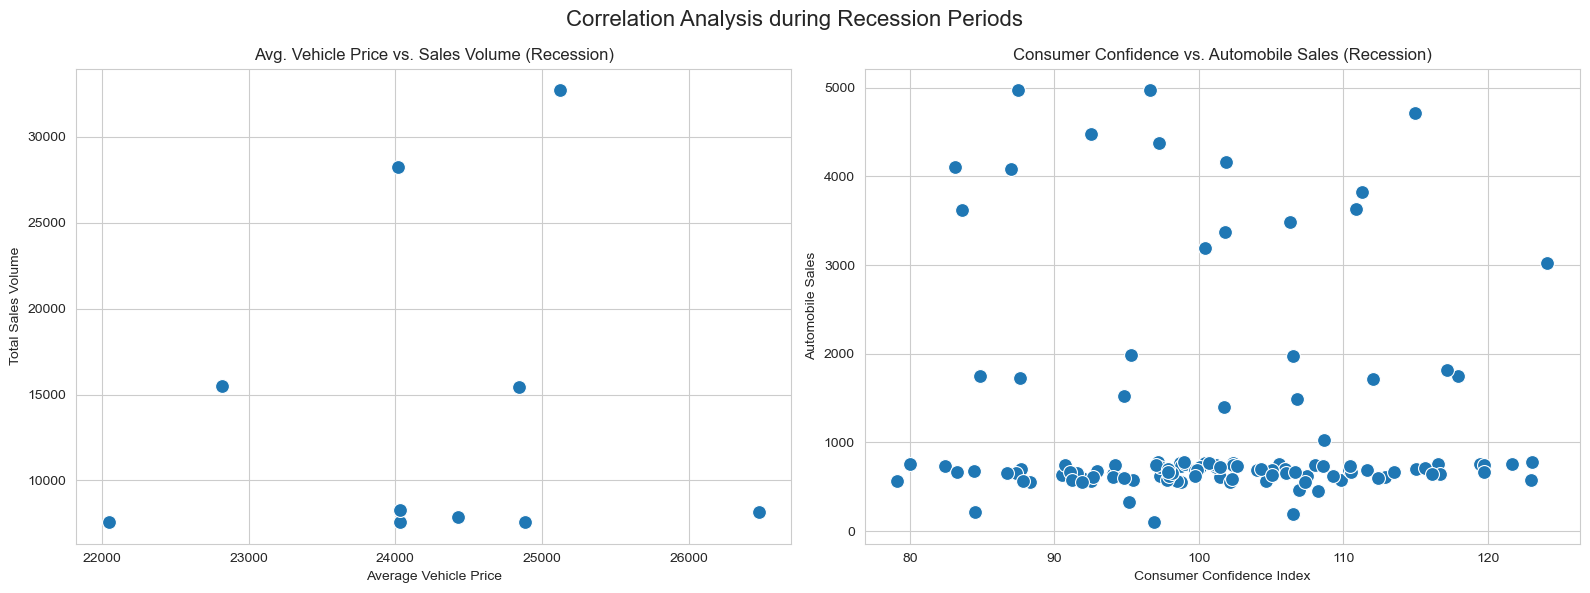

In [21]:
recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
df_recession = df[df['Year'].isin(recession_years)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

price_sales = df_recession.groupby('Year').agg(
    Avg_Price=('Price', 'mean'),
    Total_Sales=('Automobile_Sales', 'sum')
).reset_index()

sns.scatterplot(data=price_sales, x='Avg_Price', y='Total_Sales', ax=ax1, s=100)
ax1.set_title('Avg. Vehicle Price vs. Sales Volume (Recession)')
ax1.set_xlabel('Average Vehicle Price')
ax1.set_ylabel('Total Sales Volume')

sns.scatterplot(data=df_recession, x='Consumer_Confidence', y='Automobile_Sales', ax=ax2, s=100)
ax2.set_title('Consumer Confidence vs. Automobile Sales (Recession)')
ax2.set_xlabel('Consumer Confidence Index')
ax2.set_ylabel('Automobile Sales')

fig.suptitle('Correlation Analysis during Recession Periods', fontsize=16)
plt.tight_layout()
plt.savefig('Scatter.png')
plt.show()

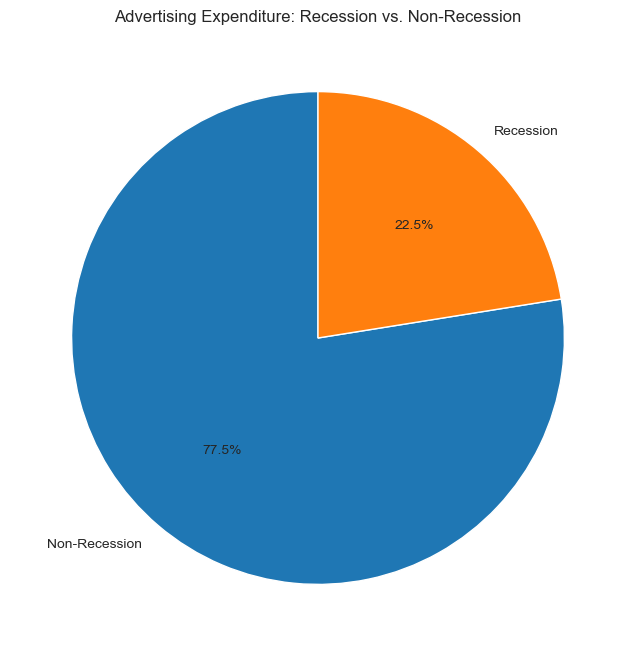

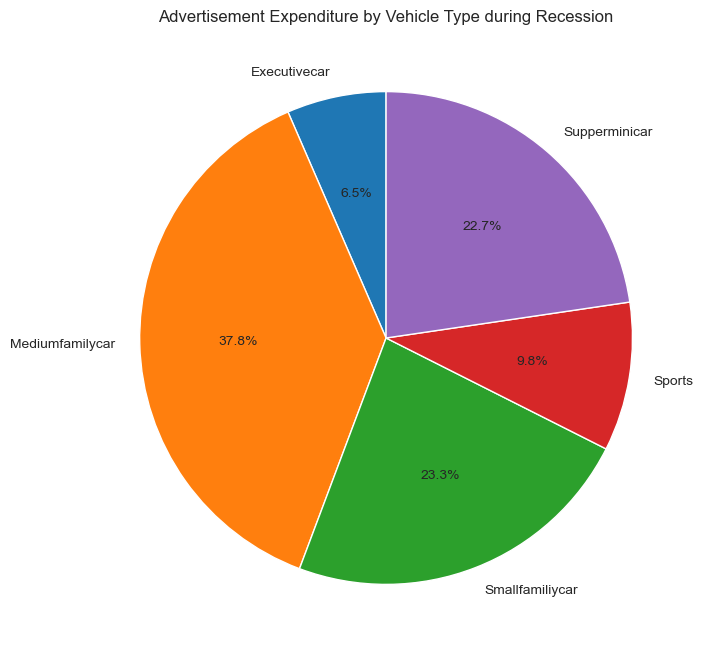

In [22]:

recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
df['Recession_Status'] = df['Year'].apply(lambda x: 'Recession' if x in recession_years else 'Non-Recession')

# Task 1.7: Advertising expenditure in recession vs. non-recession
expenditure_by_period = df.groupby('Recession_Status')['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 8))
plt.pie(expenditure_by_period, labels=expenditure_by_period.index, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure: Recession vs. Non-Recession')
plt.savefig('Pie_1.png')
plt.show()

# Task 1.8: Advertisement expenditure for each vehicle type during recession
df_recession = df[df['Recession_Status'] == 'Recession']
expenditure_by_vehicle = df_recession.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 8))
plt.pie(expenditure_by_vehicle, labels=expenditure_by_vehicle.index, autopct='%1.1f%%', startangle=90)
plt.title('Advertisement Expenditure by Vehicle Type during Recession')
plt.savefig('Pie_2.png')
plt.show()

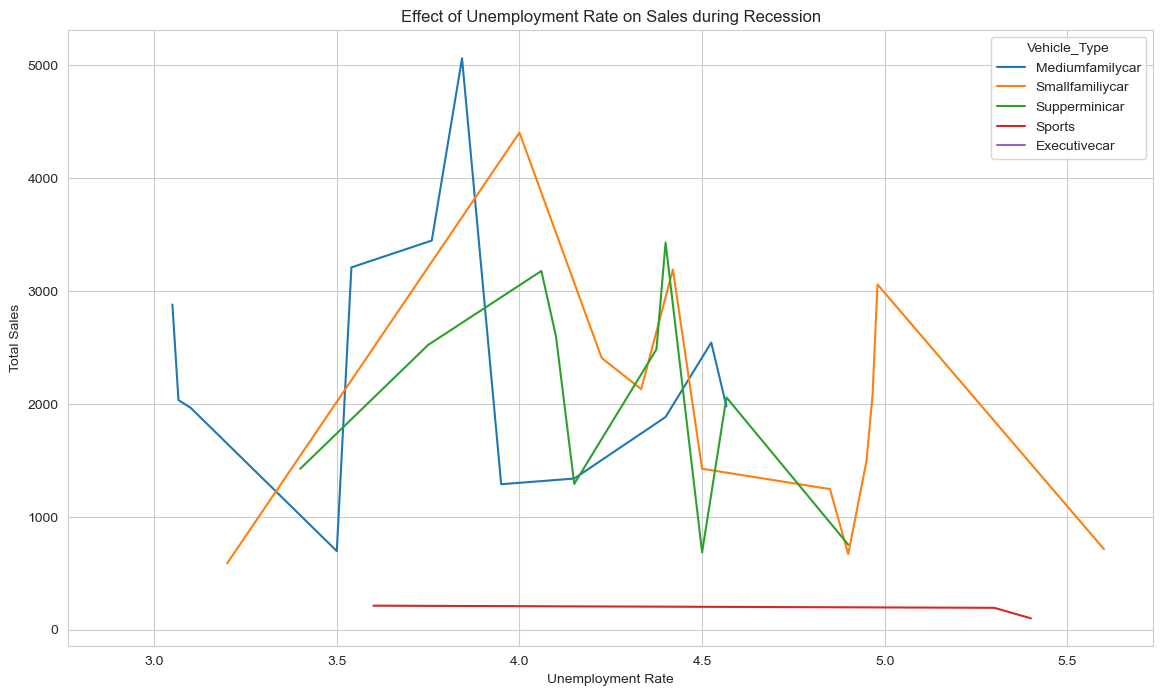

In [24]:
df_recession = df[df['Recession'] == 1]

# Group data by Year and Vehicle_Type to analyze trends
recession_trends = df_recession.groupby(['Year', 'Vehicle_Type']).agg(
    Unemployment_Rate=('unemployment_rate', 'mean'),  # Use the corrected column name
    Automobile_Sales=('Automobile_Sales', 'sum')
).reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=recession_trends, x='Unemployment_Rate', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Effect of Unemployment Rate on Sales during Recession')
plt.xlabel('Unemployment Rate')
plt.ylabel('Total Sales')
plt.grid(True)
plt.savefig('Line_plot_3.png')
plt.show()

In [26]:
pip install dash

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   - -----------------------------

In [28]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# URL for the historical automobile sales data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)

# Data Pre-processing
recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
df['Recession_Status'] = df['Year'].apply(lambda x: 'Recession' if x in recession_years else 'Non-Recession')

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        html.Label("Select Report Type:"),
        dcc.Dropdown(
            id='report-type-dropdown',
            options=[
                {'label': 'Recession Report', 'value': 'Recession'},
                {'label': 'Yearly Report', 'value': 'Yearly'}
            ],
            value='Yearly',
            placeholder='Select a report type'
        )
    ], style={'width': '40%', 'display': 'inline-block', 'margin': '10px'}),
    
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': i, 'value': i} for i in sorted(df['Year'].unique())],
            value=2008,
            placeholder='Select a year'
        )
    ], style={'width': '40%', 'display': 'inline-block', 'margin': '10px'}),
    
    html.Div(id='output-container', className='output-container', children=[
        html.Div(id='graph-container')
    ]),
])

# Define the callback function to update the output container
@app.callback(
    Output('graph-container', 'children'),
    [Input('report-type-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_output_div(report_type, selected_year):
    if report_type == 'Recession':
        df_recession = df[df['Recession_Status'] == 'Recession']
        
        # Task 2.5: Create graphs for Recession Report Statistics
        
        # Plot 1: Total Automobile Sales during Recession
        yearly_sales = df_recession.groupby('Year')['Automobile_Sales'].sum().reset_index()
        fig1 = px.line(yearly_sales, x='Year', y='Automobile_Sales', title='Total Automobile Sales during Recession')
        
        # Plot 2: Average Price during Recession
        avg_price = df_recession.groupby('Year')['Price'].mean().reset_index()
        fig2 = px.line(avg_price, x='Year', y='Price', title='Average Vehicle Price during Recession')
        
        return [
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2)
        ]
        
    elif report_type == 'Yearly':
        df_yearly = df[df['Year'] == selected_year]
        
        # Task 2.6: Create graphs for Yearly Report Statistics
        
        # Plot 1: Total Sales by Vehicle Type for the selected year
        sales_by_type = df_yearly.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
        fig1 = px.bar(sales_by_type, x='Vehicle_Type', y='Automobile_Sales', title=f'Sales by Vehicle Type in {selected_year}')
        
        # Plot 2: Sales by Month for the selected year
        sales_by_month = df_yearly.groupby('Month')['Automobile_Sales'].sum().reset_index()
        fig2 = px.line(sales_by_month, x='Month', y='Automobile_Sales', title=f'Monthly Sales in {selected_year}')
        
        return [
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2)
        ]
if __name__ == '__main__':
    app.run(debug=True)

In [29]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# URL for the historical automobile sales data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(URL)
except Exception as e:
    print(f"Error loading data: {e}")
    # Create an empty DataFrame to prevent app crash if data load fails
    df = pd.DataFrame(columns=['Year', 'Month', 'Automobile_Sales', 'Price', 'Vehicle_Type', 'Recession'])

# Data Pre-processing
recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
df['Recession_Status'] = df['Year'].apply(lambda x: 'Recession' if x in recession_years else 'Non-Recession')

app = dash.Dash(__name__)

# --- Task 2.1, 2.2, 2.3: App Layout ---
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign': 'center', 'color': '#503D36'}),
    
    html.Div([
        html.Label("Select Report Type:", style={'margin-right': '20px'}),
        dcc.Dropdown(
            id='report-type-dropdown',
            options=[
                {'label': 'Recession Report', 'value': 'Recession'},
                {'label': 'Yearly Report', 'value': 'Yearly'}
            ],
            value='Recession',
            placeholder='Select a report type',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'textAlignLast': 'center'}
        )
    ], style={'width': '48%', 'display': 'inline-block'}),
    
    html.Div([
        html.Label("Select Year:", style={'margin-right': '20px'}),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': i, 'value': i} for i in sorted(df['Year'].unique())],
            value=2008,
            placeholder='Select a year',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'textAlignLast': 'center'}
        )
    ], style={'width': '48%', 'display': 'inline-block'}),
    
    # Task 2.3: Output division
    html.Div(id='output-container', className='output-container', style={'margin-top': '20px'}),
])

# --- Task 2.4: Callbacks ---
@app.callback(
    Output('output-container', 'children'),
    [Input('report-type-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_output_div(report_type, selected_year):
    # Task 2.5: Create and display graphs for Recession Report Statistics
    if report_type == 'Recession':
        df_recession = df[df['Recession_Status'] == 'Recession']
        
        # Plot 1: Total Automobile Sales during Recession
        yearly_sales = df_recession.groupby('Year')['Automobile_Sales'].sum().reset_index()
        fig1 = px.line(yearly_sales, x='Year', y='Automobile_Sales', title='Total Automobile Sales during Recession', markers=True)
        
        # Plot 2: Average Price during Recession
        avg_price = df_recession.groupby('Year')['Price'].mean().reset_index()
        fig2 = px.line(avg_price, x='Year', y='Price', title='Average Vehicle Price during Recession', markers=True)
        
        return [
            html.Div(dcc.Graph(figure=fig1), style={'width': '48%', 'display': 'inline-block'}),
            html.Div(dcc.Graph(figure=fig2), style={'width': '48%', 'display': 'inline-block'}),
        ]
        
    # Task 2.6: Create and display graphs for Yearly Report Statistics
    elif report_type == 'Yearly':
        df_yearly = df[df['Year'] == selected_year]
        
        # Plot 1: Total Sales by Vehicle Type for the selected year
        sales_by_type = df_yearly.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
        fig1 = px.bar(sales_by_type, x='Vehicle_Type', y='Automobile_Sales', title=f'Sales by Vehicle Type in {selected_year}')
        
        # Plot 2: Sales by Month for the selected year
        sales_by_month = df_yearly.groupby('Month')['Automobile_Sales'].sum().reset_index()
        fig2 = px.line(sales_by_month, x='Month', y='Automobile_Sales', title=f'Monthly Sales in {selected_year}', markers=True)
        
        return [
            html.Div(dcc.Graph(figure=fig1), style={'width': '48%', 'display': 'inline-block'}),
            html.Div(dcc.Graph(figure=fig2), style={'width': '48%', 'display': 'inline-block'}),
        ]

if __name__ == '__main__':
    app.run(debug=True)

In [30]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# URL for the historical automobile sales data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(URL)
except Exception as e:
    print(f"Error loading data: {e}")
    # Create an empty DataFrame to prevent app crash if data load fails
    df = pd.DataFrame(columns=['Year', 'Month', 'Automobile_Sales', 'Price', 'Vehicle_Type', 'Recession'])

# Data Pre-processing
recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
df['Recession_Status'] = df['Year'].apply(lambda x: 'Recession' if x in recession_years else 'Non-Recession')

app = dash.Dash(__name__)

# App Layout
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign': 'center', 'color': '#503D36'}),
    
    html.Div([
        html.Label("Select Report Type:", style={'margin-right': '20px'}),
        dcc.Dropdown(
            id='report-type-dropdown',
            options=[
                {'label': 'Recession Report', 'value': 'Recession'},
                {'label': 'Yearly Report', 'value': 'Yearly'}
            ],
            value='Recession',
            placeholder='Select a report type',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'textAlignLast': 'center'}
        )
    ], style={'width': '48%', 'display': 'inline-block'}),
    
    html.Div([
        html.Label("Select Year:", style={'margin-right': '20px'}),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': i, 'value': i} for i in sorted(df['Year'].unique())],
            value=2008,
            placeholder='Select a year',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'textAlignLast': 'center'}
        )
    ], style={'width': '48%', 'display': 'inline-block'}),
    
    html.Div(id='output-container', className='output-container', style={'margin-top': '20px'}),
])

# Callbacks
@app.callback(
    Output('output-container', 'children'),
    [Input('report-type-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_output_div(report_type, selected_year):
    if report_type == 'Recession':
        df_recession = df[df['Recession_Status'] == 'Recession']
        
        yearly_sales = df_recession.groupby('Year')['Automobile_Sales'].sum().reset_index()
        fig1 = px.line(yearly_sales, x='Year', y='Automobile_Sales', title='Total Automobile Sales during Recession', markers=True)
        
        avg_price = df_recession.groupby('Year')['Price'].mean().reset_index()
        fig2 = px.line(avg_price, x='Year', y='Price', title='Average Vehicle Price during Recession', markers=True)
        
        return [
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2)
        ]
        
    elif report_type == 'Yearly':
        df_yearly = df[df['Year'] == selected_year]
        
        sales_by_type = df_yearly.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
        fig1 = px.bar(sales_by_type, x='Vehicle_Type', y='Automobile_Sales', title=f'Sales by Vehicle Type in {selected_year}')
        
        sales_by_month = df_yearly.groupby('Month')['Automobile_Sales'].sum().reset_index()
        fig2 = px.line(sales_by_month, x='Month', y='Automobile_Sales', title=f'Monthly Sales in {selected_year}', markers=True)
        
        return [
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2)
        ]

if __name__ == '__main__':
    app.run(debug=True)